# Speed up your Pandas Code!

In [1]:
import pandas as pd
import numpy as np

## Create our dataset

In [2]:
def get_data(size = 10_000):
    df = pd.DataFrame()
    df['age'] = np.random.randint(0, 100, size)
    df['time_in_bed'] = np.random.randint(0, 9, size)
    df['pct_sleeping'] = np.random.rand(size)
    df['favorite_food'] = np.random.choice(['pizza', 'taco', 'ice-cream'], size)
    df['hate_food'] = np.random.choice(['broccoli', 'candy corn', 'eggs'], size)
    return df

## The Problem
Reward calculation:
- If they were in bed for more than 5 hours AND they were sleeping for more than 50% we give them their favorite food.
- Otherwise we give them their hate food.
- If they are over 90 years old give their favorite food regardless.

In [3]:
def reward_calc(row):
    if row['age'] >= 90:
        return row['favorite_food']
    if (row['time_in_bed'] > 5) & (row['pct_sleeping'] > 0.5):
        return row['favorite_food']
    return row['hate_food']

## Level 1 - Loop

In [5]:
%%timeit
df = get_data()
for index, row in df.iterrows():
    df.loc[index, 'reward'] = reward_calc(row)

3.44 s ± 5.56 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Level 2 - Apply

In [6]:
%%timeit
df = get_data()
df['reward'] = df.apply(reward_calc, axis=1)

189 ms ± 1.97 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Level 3 - Vectorized

In [30]:
df = get_data()

In [31]:
%%timeit
df['reward'] = df['hate_food']
df.loc[((df['pct_sleeping'] > 0.5) &
        (df['time_in_bed'] > 5)) |
       (df['age'] > 90), 'reward'] = df['favorite_food']

1.57 ms ± 40.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Plot Differences

In [32]:
results = pd.DataFrame(
    [
        ["loop", 3580, 48.3],
        ["apply", 192, 6.34],
        ["vectorized", 1.36, 0.00896],
    ],
    columns=["type", "mean", "std"],
)

<AxesSubplot:title={'center':'Time to Run Reward Calc'}, xlabel='type'>

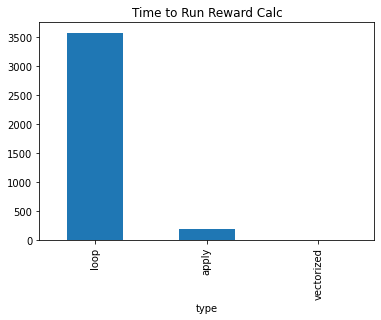

In [34]:
results.set_index('type')['mean'].plot(kind='bar', title='Time to Run Reward Calc')